In [29]:
import numpy as np 
import pandas as pd

data=pd.read_csv("temizlenmis_veri.csv")

In [31]:
from sklearn.impute import SimpleImputer
# Hedef değişken
y = data["survival_status"]

# Özelliklerden hedef değişkeni çıkar
X = data.drop("survival_status", axis=1)
data = data.drop(columns=["survival_time"])
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
# '?' içerenleri NaN'e çevir
X = X.replace("?", pd.NA)

# Sayısal değerlere çevrilebilenleri çevirelim
X = X.apply(pd.to_numeric, errors='coerce')

# Eksik verileri ortalama ile doldur
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Disease']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Modeli kur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap ve sonucu değerlendir
y_pred = rf_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Oranı (Accuracy): %", round(accuracy * 100, 2))

Doğruluk Oranı (Accuracy): % 97.37


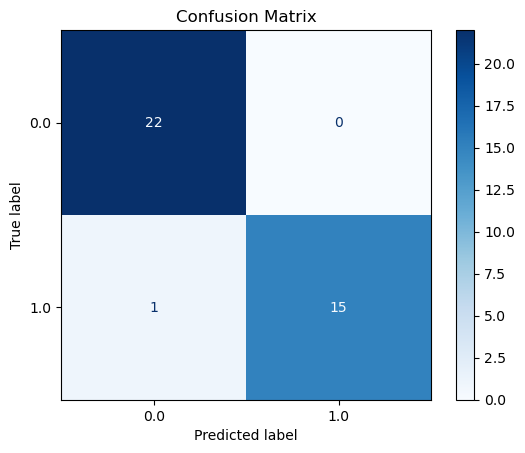

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [39]:
import pickle

# Modeli kaydet
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)